## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9887046	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9690895	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9473810	total: 59.4ms	remaining: 19.7s
3:	learn: 0.9318377	total: 60.4ms	remaining: 15s
4:	learn: 0.9152608	total: 61.4ms	remaining: 12.2s
5:	learn: 0.8977707	total: 62.3ms	remaining: 10.3s
6:	learn: 0.8826778	total: 63.1ms	remaining: 8.96s
7:	learn: 0.8643057	total: 64ms	remaining: 7.93s
8:	learn: 0.8487988	total: 64.8ms	remaining: 7.14s
9:	learn: 0.8326782	total: 65.7ms	remaining: 6.5s
10:	learn: 0.8162183	total: 66.5ms	remaining: 5.98s
11:	learn: 0.8006351	total: 67.3ms	remaining: 5.54s
12:	learn: 0.7857379	total: 68.2ms	remaining: 5.18s
13:	learn: 0.7704642	total: 69ms	remaining: 4.86s
14:	learn: 0.7575247	total: 69.8ms	remaining: 4.59s
15:	learn: 0.7430654	total: 70.7ms	remaining: 4.34s
16:	learn: 0.7312234	total: 71.5ms	remaining: 4.13s
17:	learn: 0.7180280	total: 72.3ms	remaining: 3.94s
18:	learn: 0.7054482	total: 73.1ms	remaining: 3.77s

62:	learn: 0.4062982	total: 109ms	remaining: 1.62s
63:	learn: 0.4028592	total: 110ms	remaining: 1.61s
64:	learn: 0.3998698	total: 111ms	remaining: 1.59s
65:	learn: 0.3957845	total: 112ms	remaining: 1.58s
66:	learn: 0.3924063	total: 112ms	remaining: 1.56s
67:	learn: 0.3886928	total: 113ms	remaining: 1.55s
68:	learn: 0.3852146	total: 114ms	remaining: 1.54s
69:	learn: 0.3825457	total: 115ms	remaining: 1.53s
70:	learn: 0.3798845	total: 116ms	remaining: 1.51s
71:	learn: 0.3766661	total: 117ms	remaining: 1.5s
72:	learn: 0.3734089	total: 118ms	remaining: 1.49s
73:	learn: 0.3700110	total: 118ms	remaining: 1.48s
74:	learn: 0.3668265	total: 119ms	remaining: 1.47s
75:	learn: 0.3634208	total: 120ms	remaining: 1.46s
76:	learn: 0.3601802	total: 121ms	remaining: 1.45s
77:	learn: 0.3573796	total: 122ms	remaining: 1.44s
78:	learn: 0.3548362	total: 122ms	remaining: 1.43s
79:	learn: 0.3523170	total: 123ms	remaining: 1.42s
80:	learn: 0.3501775	total: 124ms	remaining: 1.41s
81:	learn: 0.3480913	total: 125m

156:	learn: 0.2516459	total: 191ms	remaining: 1.02s
157:	learn: 0.2510267	total: 192ms	remaining: 1.02s
158:	learn: 0.2501511	total: 193ms	remaining: 1.02s
159:	learn: 0.2493852	total: 194ms	remaining: 1.02s
160:	learn: 0.2486258	total: 195ms	remaining: 1.01s
161:	learn: 0.2479765	total: 195ms	remaining: 1.01s
162:	learn: 0.2471840	total: 196ms	remaining: 1.01s
163:	learn: 0.2464978	total: 197ms	remaining: 1s
164:	learn: 0.2456713	total: 198ms	remaining: 1s
165:	learn: 0.2452121	total: 199ms	remaining: 999ms
166:	learn: 0.2445117	total: 200ms	remaining: 996ms
167:	learn: 0.2439846	total: 201ms	remaining: 993ms
168:	learn: 0.2433884	total: 201ms	remaining: 991ms
169:	learn: 0.2428148	total: 202ms	remaining: 987ms
170:	learn: 0.2422886	total: 203ms	remaining: 985ms
171:	learn: 0.2416543	total: 204ms	remaining: 982ms
172:	learn: 0.2411278	total: 205ms	remaining: 979ms
173:	learn: 0.2404425	total: 206ms	remaining: 976ms
174:	learn: 0.2399616	total: 206ms	remaining: 973ms
175:	learn: 0.2395

287:	learn: 0.1845925	total: 299ms	remaining: 740ms
288:	learn: 0.1841838	total: 300ms	remaining: 739ms
289:	learn: 0.1839594	total: 301ms	remaining: 737ms
290:	learn: 0.1834980	total: 302ms	remaining: 736ms
291:	learn: 0.1830155	total: 303ms	remaining: 735ms
292:	learn: 0.1825334	total: 304ms	remaining: 733ms
293:	learn: 0.1821009	total: 305ms	remaining: 731ms
294:	learn: 0.1816102	total: 305ms	remaining: 730ms
295:	learn: 0.1814305	total: 306ms	remaining: 728ms
296:	learn: 0.1812593	total: 307ms	remaining: 727ms
297:	learn: 0.1811310	total: 308ms	remaining: 725ms
298:	learn: 0.1808091	total: 309ms	remaining: 723ms
299:	learn: 0.1805950	total: 309ms	remaining: 722ms
300:	learn: 0.1804167	total: 310ms	remaining: 721ms
301:	learn: 0.1799246	total: 311ms	remaining: 719ms
302:	learn: 0.1795353	total: 312ms	remaining: 718ms
303:	learn: 0.1793646	total: 313ms	remaining: 716ms
304:	learn: 0.1791415	total: 314ms	remaining: 715ms
305:	learn: 0.1786508	total: 314ms	remaining: 713ms
306:	learn: 

386:	learn: 0.1540720	total: 381ms	remaining: 604ms
387:	learn: 0.1537787	total: 382ms	remaining: 603ms
388:	learn: 0.1537122	total: 383ms	remaining: 602ms
389:	learn: 0.1534130	total: 384ms	remaining: 601ms
390:	learn: 0.1531387	total: 385ms	remaining: 600ms
391:	learn: 0.1530651	total: 386ms	remaining: 598ms
392:	learn: 0.1528307	total: 387ms	remaining: 597ms
393:	learn: 0.1525893	total: 387ms	remaining: 596ms
394:	learn: 0.1523249	total: 388ms	remaining: 594ms
395:	learn: 0.1521046	total: 389ms	remaining: 593ms
396:	learn: 0.1520035	total: 390ms	remaining: 592ms
397:	learn: 0.1516028	total: 391ms	remaining: 591ms
398:	learn: 0.1514882	total: 391ms	remaining: 590ms
399:	learn: 0.1514448	total: 392ms	remaining: 588ms
400:	learn: 0.1510838	total: 393ms	remaining: 587ms
401:	learn: 0.1508145	total: 394ms	remaining: 586ms
402:	learn: 0.1507272	total: 395ms	remaining: 585ms
403:	learn: 0.1505399	total: 396ms	remaining: 584ms
404:	learn: 0.1501934	total: 396ms	remaining: 582ms
405:	learn: 

517:	learn: 0.1246792	total: 490ms	remaining: 456ms
518:	learn: 0.1243553	total: 490ms	remaining: 455ms
519:	learn: 0.1240729	total: 491ms	remaining: 454ms
520:	learn: 0.1239135	total: 492ms	remaining: 453ms
521:	learn: 0.1237231	total: 493ms	remaining: 452ms
522:	learn: 0.1235280	total: 494ms	remaining: 451ms
523:	learn: 0.1233187	total: 495ms	remaining: 450ms
524:	learn: 0.1231561	total: 496ms	remaining: 449ms
525:	learn: 0.1229604	total: 497ms	remaining: 447ms
526:	learn: 0.1225991	total: 497ms	remaining: 446ms
527:	learn: 0.1223122	total: 498ms	remaining: 445ms
528:	learn: 0.1220363	total: 499ms	remaining: 444ms
529:	learn: 0.1218395	total: 500ms	remaining: 443ms
530:	learn: 0.1216187	total: 501ms	remaining: 442ms
531:	learn: 0.1216023	total: 502ms	remaining: 441ms
532:	learn: 0.1214679	total: 503ms	remaining: 440ms
533:	learn: 0.1210708	total: 503ms	remaining: 439ms
534:	learn: 0.1209460	total: 504ms	remaining: 438ms
535:	learn: 0.1206383	total: 505ms	remaining: 437ms
536:	learn: 

612:	learn: 0.1058905	total: 572ms	remaining: 361ms
613:	learn: 0.1058324	total: 572ms	remaining: 360ms
614:	learn: 0.1058197	total: 573ms	remaining: 359ms
615:	learn: 0.1055541	total: 574ms	remaining: 358ms
616:	learn: 0.1054043	total: 575ms	remaining: 357ms
617:	learn: 0.1053293	total: 576ms	remaining: 356ms
618:	learn: 0.1051938	total: 576ms	remaining: 355ms
619:	learn: 0.1050068	total: 577ms	remaining: 354ms
620:	learn: 0.1049289	total: 578ms	remaining: 353ms
621:	learn: 0.1046588	total: 579ms	remaining: 352ms
622:	learn: 0.1044969	total: 580ms	remaining: 351ms
623:	learn: 0.1043078	total: 581ms	remaining: 350ms
624:	learn: 0.1040484	total: 581ms	remaining: 349ms
625:	learn: 0.1038649	total: 582ms	remaining: 348ms
626:	learn: 0.1036183	total: 583ms	remaining: 347ms
627:	learn: 0.1033999	total: 584ms	remaining: 346ms
628:	learn: 0.1031059	total: 585ms	remaining: 345ms
629:	learn: 0.1029406	total: 586ms	remaining: 344ms
630:	learn: 0.1027585	total: 586ms	remaining: 343ms
631:	learn: 

742:	learn: 0.0862597	total: 680ms	remaining: 235ms
743:	learn: 0.0861421	total: 681ms	remaining: 234ms
744:	learn: 0.0860263	total: 682ms	remaining: 233ms
745:	learn: 0.0860001	total: 683ms	remaining: 232ms
746:	learn: 0.0859489	total: 684ms	remaining: 231ms
747:	learn: 0.0858936	total: 684ms	remaining: 231ms
748:	learn: 0.0857312	total: 685ms	remaining: 230ms
749:	learn: 0.0856332	total: 686ms	remaining: 229ms
750:	learn: 0.0856259	total: 687ms	remaining: 228ms
751:	learn: 0.0854635	total: 688ms	remaining: 227ms
752:	learn: 0.0853939	total: 688ms	remaining: 226ms
753:	learn: 0.0852310	total: 689ms	remaining: 225ms
754:	learn: 0.0850018	total: 690ms	remaining: 224ms
755:	learn: 0.0849214	total: 691ms	remaining: 223ms
756:	learn: 0.0848469	total: 692ms	remaining: 222ms
757:	learn: 0.0847444	total: 693ms	remaining: 221ms
758:	learn: 0.0846562	total: 693ms	remaining: 220ms
759:	learn: 0.0846146	total: 694ms	remaining: 219ms
760:	learn: 0.0844923	total: 695ms	remaining: 218ms
761:	learn: 

839:	learn: 0.0764962	total: 763ms	remaining: 145ms
840:	learn: 0.0764506	total: 764ms	remaining: 144ms
841:	learn: 0.0763892	total: 764ms	remaining: 143ms
842:	learn: 0.0762878	total: 765ms	remaining: 143ms
843:	learn: 0.0761306	total: 766ms	remaining: 142ms
844:	learn: 0.0759733	total: 767ms	remaining: 141ms
845:	learn: 0.0757762	total: 768ms	remaining: 140ms
846:	learn: 0.0756636	total: 769ms	remaining: 139ms
847:	learn: 0.0756274	total: 769ms	remaining: 138ms
848:	learn: 0.0754954	total: 770ms	remaining: 137ms
849:	learn: 0.0754883	total: 771ms	remaining: 136ms
850:	learn: 0.0753903	total: 772ms	remaining: 135ms
851:	learn: 0.0753473	total: 773ms	remaining: 134ms
852:	learn: 0.0752585	total: 774ms	remaining: 133ms
853:	learn: 0.0751704	total: 775ms	remaining: 132ms
854:	learn: 0.0750292	total: 775ms	remaining: 131ms
855:	learn: 0.0749131	total: 776ms	remaining: 131ms
856:	learn: 0.0748147	total: 777ms	remaining: 130ms
857:	learn: 0.0747411	total: 778ms	remaining: 129ms
858:	learn: 

968:	learn: 0.0644628	total: 871ms	remaining: 27.9ms
969:	learn: 0.0643533	total: 872ms	remaining: 27ms
970:	learn: 0.0642461	total: 874ms	remaining: 26.1ms
971:	learn: 0.0642411	total: 874ms	remaining: 25.2ms
972:	learn: 0.0640781	total: 875ms	remaining: 24.3ms
973:	learn: 0.0640538	total: 876ms	remaining: 23.4ms
974:	learn: 0.0639211	total: 877ms	remaining: 22.5ms
975:	learn: 0.0638379	total: 878ms	remaining: 21.6ms
976:	learn: 0.0638053	total: 879ms	remaining: 20.7ms
977:	learn: 0.0638003	total: 880ms	remaining: 19.8ms
978:	learn: 0.0637307	total: 881ms	remaining: 18.9ms
979:	learn: 0.0636583	total: 881ms	remaining: 18ms
980:	learn: 0.0635982	total: 882ms	remaining: 17.1ms
981:	learn: 0.0635287	total: 883ms	remaining: 16.2ms
982:	learn: 0.0634331	total: 884ms	remaining: 15.3ms
983:	learn: 0.0634050	total: 885ms	remaining: 14.4ms
984:	learn: 0.0634000	total: 886ms	remaining: 13.5ms
985:	learn: 0.0633380	total: 886ms	remaining: 12.6ms
986:	learn: 0.0633013	total: 887ms	remaining: 11.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

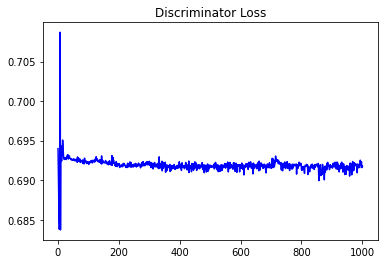

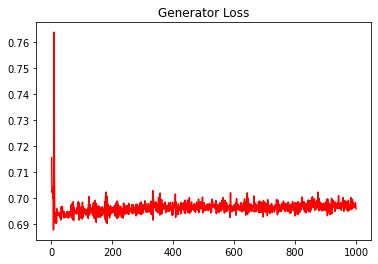

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.17366455129440914


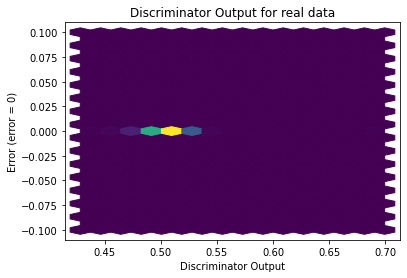

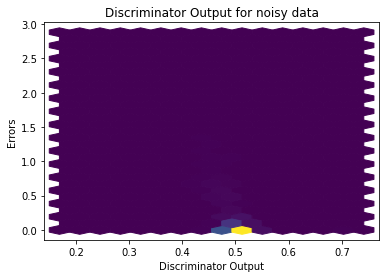

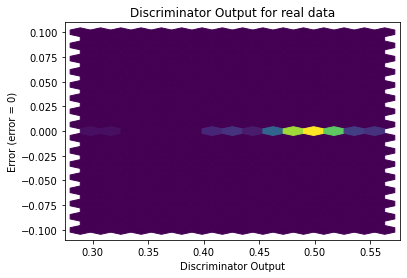

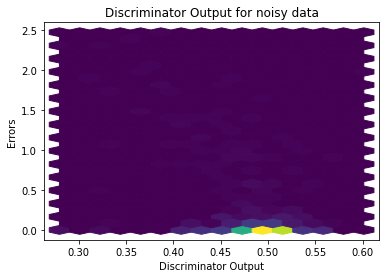

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


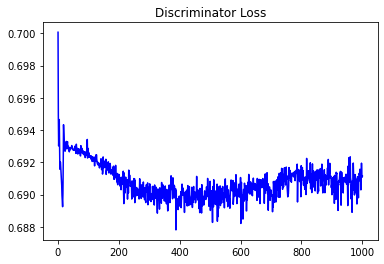

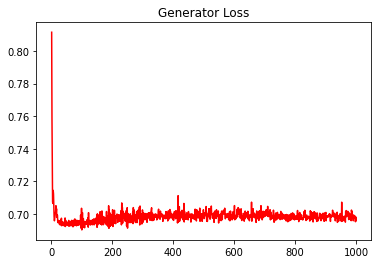

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1898771764868054


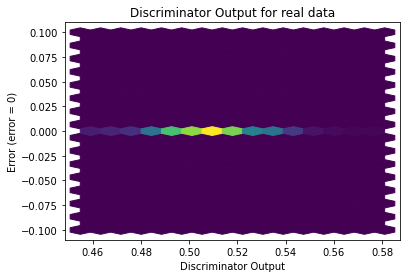

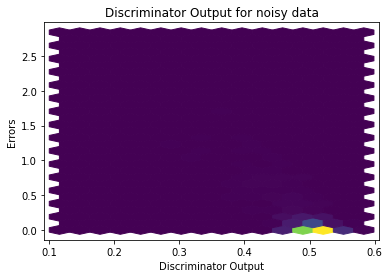

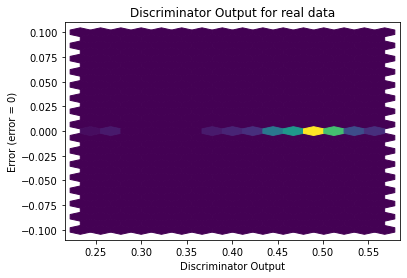

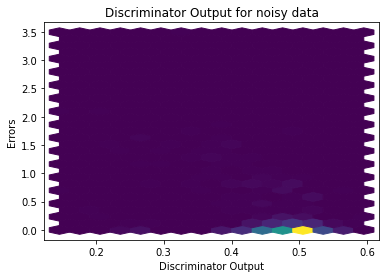

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9622]], requires_grad=True)
